In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

import pickle

# Import data

In [4]:
with open('../data/interim/text_target.pkl', 'rb') as f:
    text_target = pickle.load(f)

In [5]:
X = text_target.cleaned_text
y = text_target.target

# Vectorization

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(X)

# Scale Data

In [8]:
scaler = StandardScaler(with_mean=False)
scaled_tfidf = scaler.fit_transform(tfidf)

# KMeans Clustering and Score

In [19]:
results = KMeans(n_clusters=5).fit_transform(scaled_tfidf)
preds = kmeans.predict(scaled_tfidf)

adjusted_rand_score(y, preds)

-7.826062244670067e-06

The score is close to 0, so we can say that kmeans was close to randomly choosing classifications. 

# Decomposition for Graphing

In [14]:
t_svd = TruncatedSVD(n_components=2)
result = t_svd.fit_transform(tfidf)

(30302, 2)

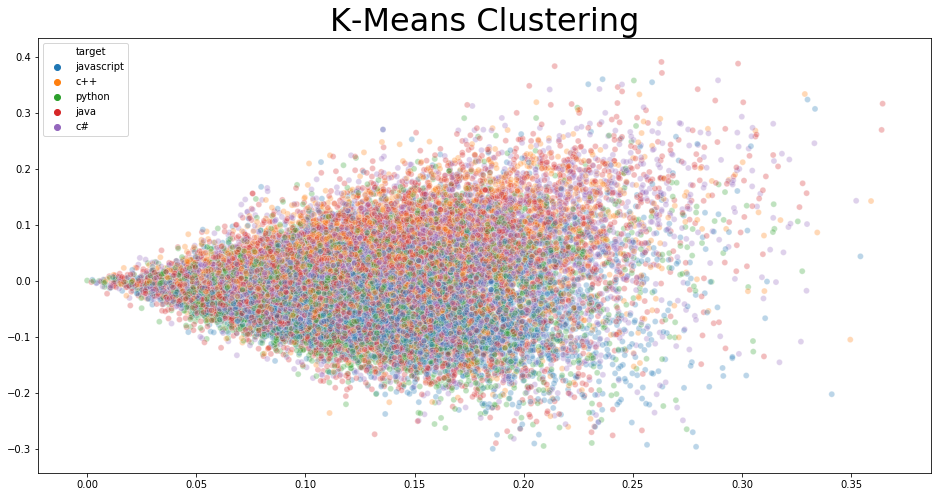

In [21]:
import seaborn as sns
x_res = result[:, 0]
y_res = result[:, 1]

plt.figure(figsize=(16,8))
sns.scatterplot(x_res, y_res, hue=y, alpha=0.3)

plt.title("K-Means Clustering (5 topic clusters)", fontsize=32)

plt.show()